## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

C:\Users\SAMANT~1\AppData\Local\Temp/ipykernel_14216/3532433508.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

C:\Users\SAMANT~1\AppData\Local\Temp/ipykernel_14216/3529810220.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


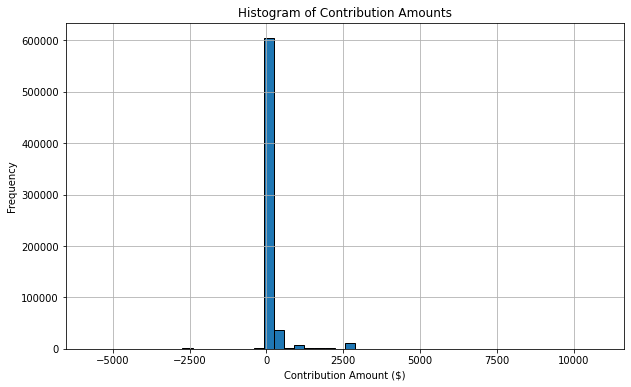

In [5]:
# 1a YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Plot the histogram of the full range of contribution amounts
plt.figure(figsize=(10, 6))
plt.hist(contrib['contb_receipt_amt'], bins=50, edgecolor='black')
plt.title('Histogram of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- **1a answer here:** Based on the histogram provided, the highest count frequency of contributions appears to be concentrated around the smaller amounts, likely between $0 and $250. This range reflects typical grassroots donation amounts and is consistent with what is often observed in political campaign contributions.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

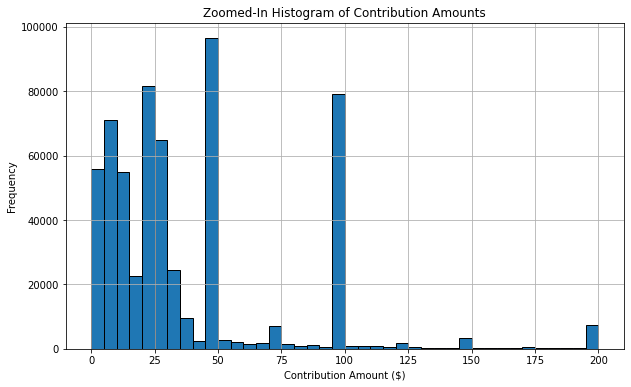

In [6]:
# 1b YOUR CODE HERE
# Zoomed-in histogram for the most frequent range
zoom_range = contrib[(contrib['contb_receipt_amt'] > 0) & (contrib['contb_receipt_amt'] <= 200)]

plt.figure(figsize=(10, 6))
plt.hist(zoom_range['contb_receipt_amt'], bins=40, edgecolor='black')
plt.title('Zoomed-In Histogram of Contribution Amounts')
plt.xlabel('Contribution Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- **1b answer here:** The zoomed-in histogram reveals several key insights about the distribution of campaign contributions. The majority of donations fall within smaller amounts, specifically around $10, $20, $25, $50, and $100. These peaks likely reflect common donation tiers set by fundraising campaigns, which are designed to appeal to grassroots supporters. Notably, there are significant spikes at rounded values such as $50 and $100, indicating that donors often choose standard, pre-set amounts rather than arbitrary figures.

The data also shows that smaller contributions, particularly those under $50, dominate the dataset, emphasizing the importance of grassroots funding in this campaign. As the contribution amounts increase beyond $100, there is a sharp decline in frequency, reflecting the fact that fewer individuals make larger donations. 

When comparing this zoomed-in histogram to the full-range histogram from 1a, the latter highlights the overall distribution and shows the dominance of smaller contributions alongside some higher-value outliers. In contrast, the zoomed-in view provides a clearer understanding of the patterns within the smaller ranges, showing detailed spikes and trends. Together, these histograms underscore the reliance on smaller contributions, a hallmark of grassroots-driven fundraising efforts.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

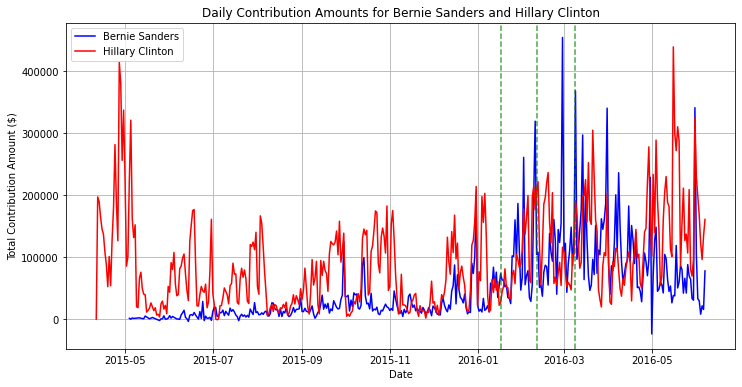

In [7]:
# 1c YOUR CODE HERE
# Filter contributions by candidate
bernie = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
hillary = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Group by date and calculate total contributions
bernie_daily = bernie.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()
hillary_daily = hillary.groupby('contb_receipt_dt')['contb_receipt_amt'].sum()

# Define debate dates
debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
debate_dates = pd.to_datetime(debate_dates)

# Plot time-series chart
plt.figure(figsize=(12, 6))
plt.plot(bernie_daily.index, bernie_daily.values, label="Bernie Sanders", color='blue')
plt.plot(hillary_daily.index, hillary_daily.values, label="Hillary Clinton", color='red')
for date in debate_dates:
    plt.axvline(x=date, color='green', linestyle='--', alpha=0.7)

plt.title('Daily Contribution Amounts for Bernie Sanders and Hillary Clinton')
plt.xlabel('Date')
plt.ylabel('Total Contribution Amount ($)')
plt.legend()
plt.grid(True)
plt.show()


- **1c answer here:** The time-series line chart displays the daily contribution amounts for Bernie Sanders and Hillary Clinton, with vertical lines marking the dates of the Democratic primary debates: January 17, February 11, and March 9, 2016. The chart reveals that both candidates experienced fluctuations in contributions surrounding the debate dates, but the impact varied between them.

For Bernie Sanders, there is a noticeable increase in contributions immediately following the debates, suggesting that his performance or messaging during these events may have energized his grassroots donor base. This aligns with Sanders’ campaign strategy, which heavily relied on small-dollar contributions from a wide base of supporters.

Hillary Clinton's contributions also show spikes, though the increases appear less consistent and pronounced compared to Sanders’. Clinton’s contributions demonstrate a steadier pattern overall, reflecting her broader fundraising strategy, which included larger contributions from a smaller number of donors.

In summary, the debates positively influenced fundraising for both candidates, with Sanders benefiting more significantly in terms of immediate spikes in contributions. This indicates that debates played a crucial role in mobilizing donors, particularly for Sanders' campaign.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [8]:
# 2a YOUR CODE HERE
# Group by candidate and count the number of donations
donations_count = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index()
donations_count.columns = ['Candidate', 'Number of Donations']

# Sort by number of donations
donations_count_sorted = donations_count.sort_values(by='Number of Donations', ascending=False)

# Display the table
donations_count_sorted


,Candidate,Number of Donations
18,"Sanders, Bernard",379284
3,"Clinton, Hillary Rodham",171104
4,"Cruz, Rafael Edward 'Ted'",56355
1,"Carson, Benjamin S.",27015
17,"Rubio, Marco",13267
5,"Fiorina, Carly",4679
15,"Paul, Rand",4164
21,"Trump, Donald J.",3806
0,"Bush, Jeb",3056
11,"Kasich, John R.",2957


- **2a answer here:** The candidate who received the largest number of contributions is Bernie Sanders, with 379,284 donations. This reflects his strong grassroots fundraising strategy, where he garnered a high volume of small-dollar contributions from a broad base of supporters.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [9]:
# 2b YOUR CODE HERE
# Group by candidate and sum the total donations
donations_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
donations_total.columns = ['Candidate', 'Total Value of Donations']

# Sort by total value of donations
donations_total_sorted = donations_total.sort_values(by='Total Value of Donations', ascending=False)

# Display the table
donations_total_sorted


,Candidate,Total Value of Donations
3,"Clinton, Hillary Rodham","38,969,122.68"
18,"Sanders, Bernard","19,062,998.80"
4,"Cruz, Rafael Edward 'Ted'","5,926,568.27"
17,"Rubio, Marco","4,998,700.92"
0,"Bush, Jeb","3,316,836.83"
1,"Carson, Benjamin S.","3,022,105.15"
5,"Fiorina, Carly","1,473,989.42"
11,"Kasich, John R.","1,471,417.54"
21,"Trump, Donald J.","868,672.16"
15,"Paul, Rand","721,563.14"


- **2b answer here:** The candidate who raised the most money in California is Hillary Clinton, with a total value of donations amounting to $38,969,122.68. This reflects her ability to secure significant contributions from donors, including larger individual donations, as part of her fundraising strategy.

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [11]:
# 2c YOUR CODE HERE
# Merge the two tables on Candidate
combined_table = pd.merge(donations_count_sorted, donations_total_sorted, on='Candidate')

# Display the merged table
combined_table


,Candidate,Number of Donations,Total Value of Donations
0,"Sanders, Bernard",379284,"19,062,998.80"
1,"Clinton, Hillary Rodham",171104,"38,969,122.68"
2,"Cruz, Rafael Edward 'Ted'",56355,"5,926,568.27"
3,"Carson, Benjamin S.",27015,"3,022,105.15"
4,"Rubio, Marco",13267,"4,998,700.92"
5,"Fiorina, Carly",4679,"1,473,989.42"
6,"Paul, Rand",4164,"721,563.14"
7,"Trump, Donald J.",3806,"868,672.16"
8,"Bush, Jeb",3056,"3,316,836.83"
9,"Kasich, John R.",2957,"1,471,417.54"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [12]:
# 2d YOUR CODE HERE
# Calculate the average donation
combined_table['Average Donation ($)'] = combined_table['Total Value of Donations'] / combined_table['Number of Donations']

# Sort by average donation
combined_table_sorted = combined_table.sort_values(by='Average Donation ($)', ascending=False)

# Display the sorted table
combined_table_sorted


,Candidate,Number of Donations,Total Value of Donations,Average Donation ($)
23,"Gilmore, James S III",3,"8,100.00","2,700.00"
18,"Perry, James R. (Rick)",104,"208,400.00","2,003.85"
22,"Pataki, George E.",20,"30,450.00","1,522.50"
14,"Christie, Christopher J.",333,"456,066.00","1,369.57"
15,"Graham, Lindsey O.",305,"379,495.00","1,244.25"
8,"Bush, Jeb",3056,"3,316,836.83","1,085.35"
12,"O'Malley, Martin Joseph",392,"297,334.26",758.51
21,"Jindal, Bobby",31,"23,231.26",749.40
10,"Walker, Scott",666,"492,706.90",739.80
17,"Webb, James Henry Jr.",106,"76,568.16",722.34


- **2d answer here:** The candidate with the highest average donation is James S. Gilmore III, with an average donation amount of $2,700.00. This reflects that while he received very few contributions (only 3 donations), they were all at the maximum individual contribution limit allowed for federal campaigns during that election cycle.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

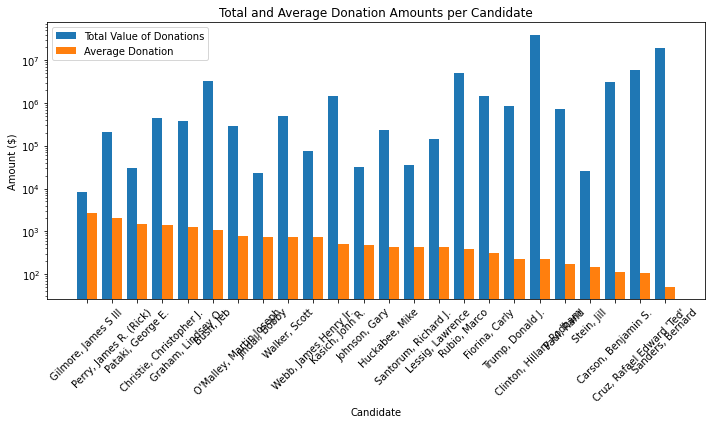

In [13]:
# 2e YOUR CODE HERE
import numpy as np

# Set up the bar chart
x = np.arange(len(combined_table_sorted['Candidate']))
width = 0.4

# Plot the total donations and average donations
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, combined_table_sorted['Total Value of Donations'], width, label='Total Value of Donations')
plt.bar(x + width/2, combined_table_sorted['Average Donation ($)'], width, label='Average Donation')

# Add labels, title, and legend
plt.xlabel('Candidate')
plt.ylabel('Amount ($)')
plt.title('Total and Average Donation Amounts per Candidate')
plt.xticks(x, combined_table_sorted['Candidate'], rotation=45)
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.tight_layout()
plt.show()


**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** The analysis of campaign contributions in California reveals several significant insights. Candidates with broad grassroots appeal, such as Bernie Sanders, received the highest number of contributions, though these were predominantly small-dollar amounts, leading to a lower average donation. In contrast, candidates like Hillary Clinton and Jeb Bush managed to secure higher average donation amounts, reflecting a fundraising strategy focused on larger contributions from a smaller donor base. Interestingly, James S. Gilmore III had the highest average donation due to a very small number of contributions, each reaching the maximum legal limit. This disparity highlights the diversity in fundraising strategies, with some campaigns relying heavily on widespread grassroots support and others focusing on high-value donors. Additionally, the use of a log scale in the bar chart illustrates the stark contrast between total contributions and average donation size, emphasizing the varying financial dynamics of different campaigns.

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [14]:
# 3a YOUR CODE HERE
# Filter the data for Hillary Clinton
clinton_data = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']

# Get the top 5 occupations
top_occupations_clinton = clinton_data['contbr_occupation'].value_counts().head(5)

# Display the result
top_occupations_clinton


contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [20]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return df['contbr_occupation'].value_counts().head(5)

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [21]:
# 3c YOUR CODE HERE
# Subset data for the three candidates
sanders_data = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
trump_data = contrib[contrib['cand_nm'] == 'Trump, Donald J.']

# Get the top 5 occupations for each candidate
top_occupations_sanders = get_donors(sanders_data)
top_occupations_trump = get_donors(trump_data)

# Display the results
print("Hillary Clinton - Top 5 Occupations:\n", top_occupations_clinton)
print("\nBernie Sanders - Top 5 Occupations:\n", top_occupations_sanders)
print("\nDonald Trump - Top 5 Occupations:\n", top_occupations_trump)


Hillary Clinton - Top 5 Occupations:
 contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

Bernie Sanders - Top 5 Occupations:
 contbr_occupation
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: count, dtype: int64

Donald Trump - Top 5 Occupations:
 contbr_occupation
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: count, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [22]:
# 3d YOUR CODE HERE
# Group by candidate and apply the get_donors function
grouped_occupations = contrib.groupby('cand_nm').apply(get_donors)

# Display the grouped results
grouped_occupations


cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** The analysis of donor occupations reveals distinct patterns in the types of individuals supporting each candidate. For Hillary Clinton, the top donor occupations include retirees, attorneys, teachers, and homemakers. These roles reflect her broad appeal among professionals, high-income individuals, and traditional Democratic voter bases. Bernie Sanders’ donor base, on the other hand, is dominated by individuals not employed, retirees, teachers, software engineers, and engineers. This aligns with his grassroots campaign strategy and popularity among working-class and middle-class voters, as well as those in technical fields. Donald Trump's top donor occupations, including retirees, CEOs, salespeople, and business owners, highlight his appeal to wealthier individuals, entrepreneurs, and those in leadership roles.

These findings show how each candidate's campaign resonated with specific demographics and occupational groups. Retirees are a common donor group across campaigns, reflecting their financial ability to contribute and engagement with politics. The variation in occupations among candidates emphasizes the differences in their campaign messages and the segments of the population they appealed to.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** When comparing the donor occupations in Section 3 to the financial data in Section 2, several new insights emerge. Hillary Clinton raised the most total money, which aligns with her support from high-income professions such as attorneys and homemakers. This indicates that her fundraising success relied on fewer but larger contributions from wealthier donors. Bernie Sanders, despite raising less total money, had the highest number of contributions, reflecting his appeal to grassroots donors in occupations like teachers, engineers, and software engineers. These groups likely contributed smaller amounts, consistent with Sanders' lower average donation value.

Donald Trump's donor base, with occupations such as CEOs and business owners, reflects his relatively high average donation amount. This aligns with his appeal to wealthy individuals who could afford larger contributions. These findings demonstrate how the occupational breakdown provides deeper context for the financial patterns observed in Section 2. They highlight how each campaign's donor base and financial dynamics were shaped by its messaging, outreach strategy, and appeal to specific socioeconomic groups.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k